In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score

In [45]:
df = pd.read_csv(r"C:\Users\aleim\OneDrive\Documentos\UNAD\Primer semestre 2025\Analisis de Datos\Tarea 3\Dataset regresion Logistica\heart_cleveland_upload.csv")

In [48]:
print(df.isnull().sum())

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64


In [50]:
X = df.drop('condition', axis=1)  
y = df['condition']   

In [52]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [56]:
modelo_log = LogisticRegression(max_iter=1000)
modelo_log.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [58]:
y_pred = modelo_log.predict(X_test)

Matriz de Confusión:
[[23  9]
 [ 7 21]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.70      0.75      0.72        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60

Precisión (accuracy): 0.7333333333333333


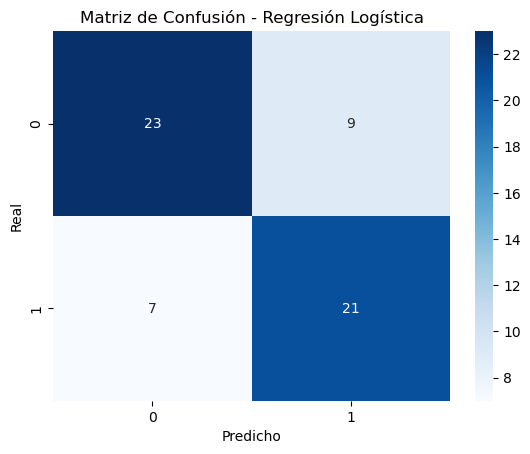

In [60]:
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))
print("Precisión (accuracy):", accuracy_score(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión - Regresión Logística")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()

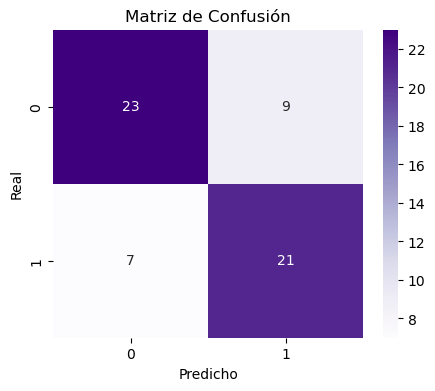

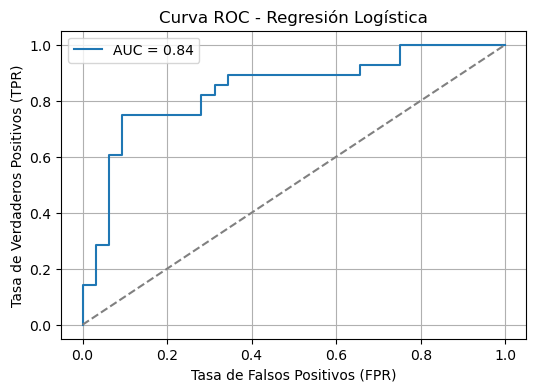

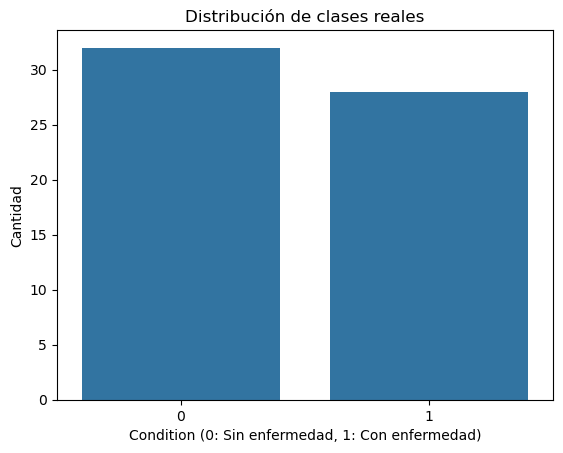

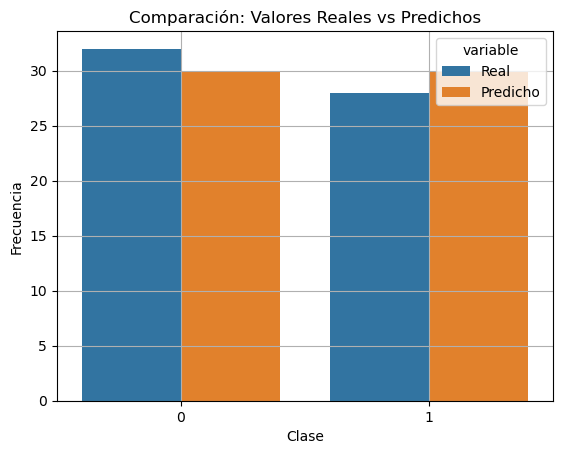

In [65]:
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Purples')
plt.title("Matriz de Confusión")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()


y_proba = modelo_log.predict_proba(X_test)[:, 1]  
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.title("Curva ROC - Regresión Logística")
plt.legend()
plt.grid()
plt.show()


sns.countplot(x=y_test)
plt.title("Distribución de clases reales")
plt.xlabel("Condition (0: Sin enfermedad, 1: Con enfermedad)")
plt.ylabel("Cantidad")
plt.show()


comparacion = pd.DataFrame({'Real': y_test, 'Predicho': y_pred})
sns.countplot(x='value', hue='variable', 
              data=pd.melt(comparacion.reset_index(drop=True)))
plt.title("Comparación: Valores Reales vs Predichos")
plt.xlabel("Clase")
plt.ylabel("Frecuencia")
plt.grid()
plt.show()